In [1]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('data/data.csv', encoding='latin-1')

In [3]:
print(len(df))

1653


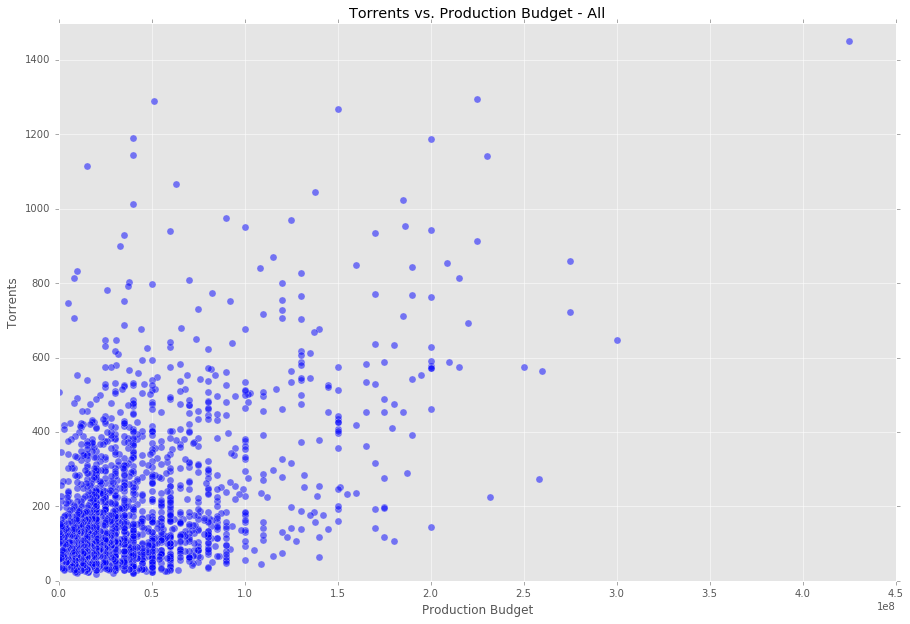

In [4]:
plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - All')
plt.scatter(df['Prod_Budget'], df['Total_Torrents'], alpha=0.5, s=50)

In [5]:
# unique list of grouped rating as a string
unq_rating = df['Rated'].unique()
unq_rating = unq_rating.tolist()
unq_rating = [rating.strip() for rating in unq_rating if type(rating) == str]
print(unq_rating)

['PG-13', 'PG', 'G', 'R', 'TV-14', 'NC-17', 'APPROVED', 'M', 'GP', 'X', 'NOT RATED', 'PASSED', 'UNRATED']


In [6]:
df['Rated'].value_counts()

R            690
PG-13        660
PG           255
G             21
APPROVED       6
M              3
UNRATED        3
NOT RATED      3
X              2
TV-14          1
GP             1
PASSED         1
NC-17          1
Name: Rated, dtype: int64

In [7]:
# dictionary - count of genre occurences
count = defaultdict(lambda:0)

for rating in unq_rating:
    count[rating] = df.Rated.value_counts()[rating]
    #count[rating] = df.Rated.str.contains(rating).sum()

import operator
srt = sorted(count.items(), key=operator.itemgetter(1))
srt = srt[::-1]
print(srt)

[('R', 690), ('PG-13', 660), ('PG', 255), ('G', 21), ('APPROVED', 6), ('M', 3), ('NOT RATED', 3), ('UNRATED', 3), ('X', 2), ('TV-14', 1), ('GP', 1), ('PASSED', 1), ('NC-17', 1)]


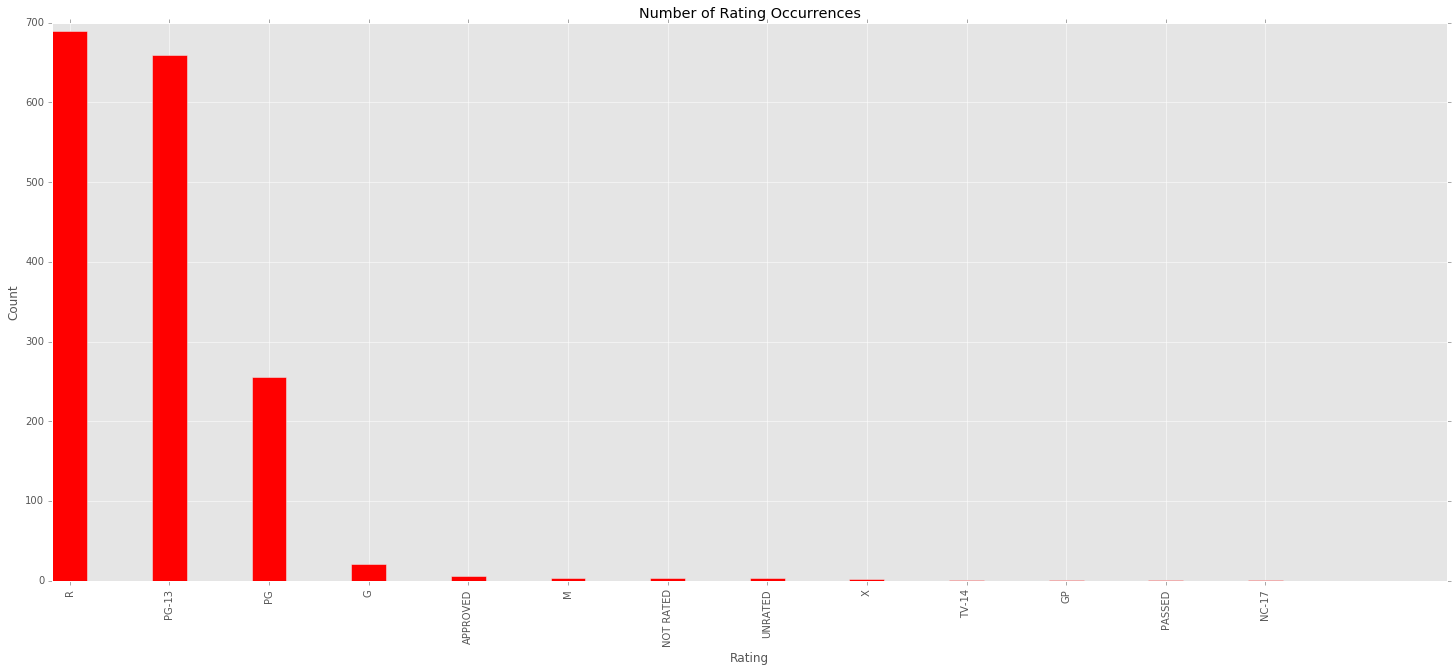

[('R', 690), ('PG-13', 660), ('PG', 255), ('G', 21), ('APPROVED', 6), ('M', 3), ('NOT RATED', 3), ('UNRATED', 3), ('X', 2), ('TV-14', 1), ('GP', 1), ('PASSED', 1), ('NC-17', 1)]


In [8]:
plt.figure(figsize=(25,10))

ind = np.arange(len(count)) # the x locations for the groups
width = 0.35 # the width of the bars

bar_rating = [rating for rating, count in srt]
bar_count = [count for rating, count in srt]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Rating')
plt.title('Number of Rating Occurrences')
plt.xticks(ind + width/2., (bar_rating), rotation='vertical')
plt.yticks(np.arange(0, 701, 100))

plt.show()
print(srt)

In [9]:
totl = 0

for k,v in srt:
    totl += v
print(totl)

1647


In [10]:
ratings = ['PG-13', 'PG', 'G', 'R']
df = df.loc[df['Rated'].isin(ratings)]
print(len(df))

1626


690


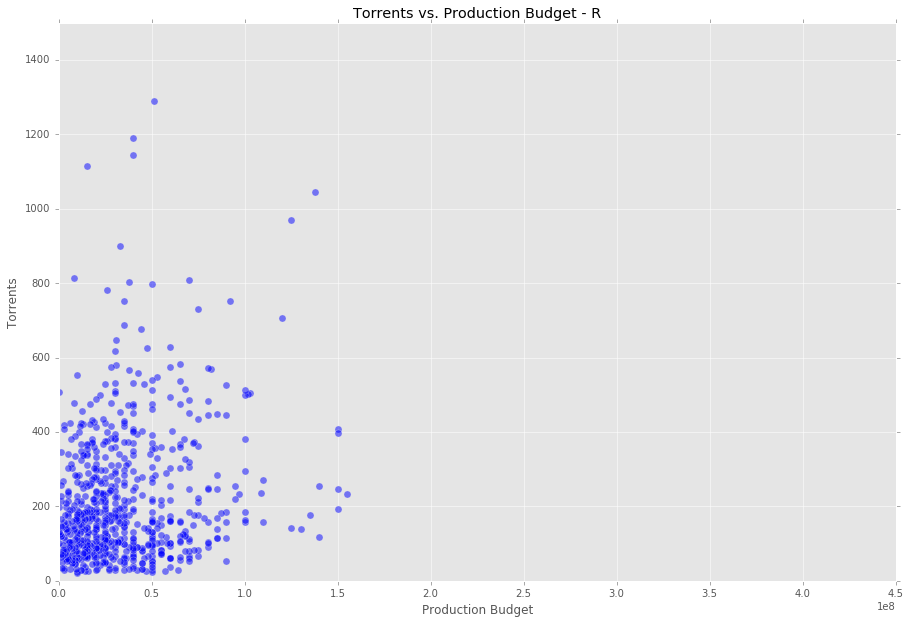

In [11]:
term = 'R'
df_a = df.loc[df['Rated']== term]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

660


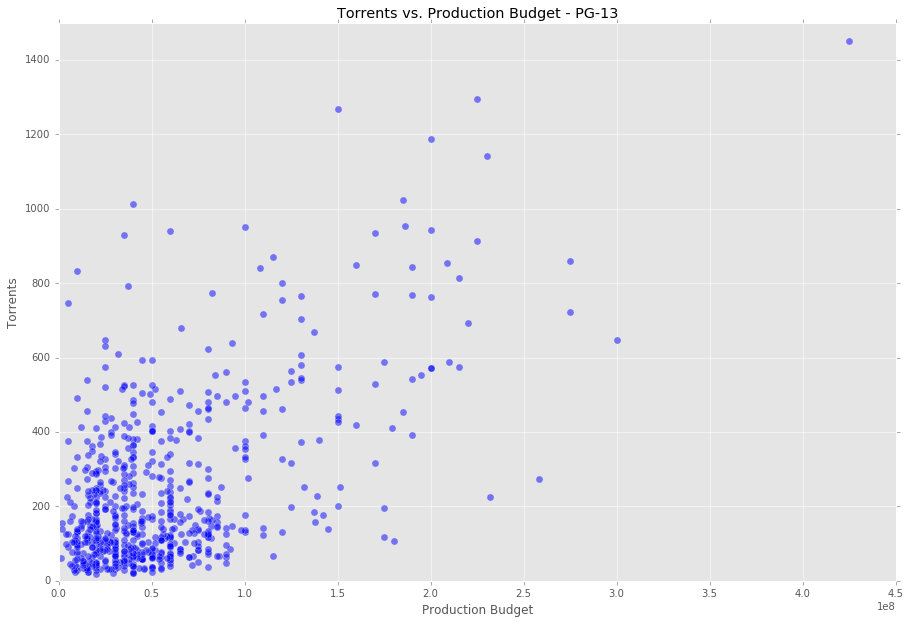

In [12]:
term = 'PG-13'
df_a = df.loc[df['Rated']== term]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

255


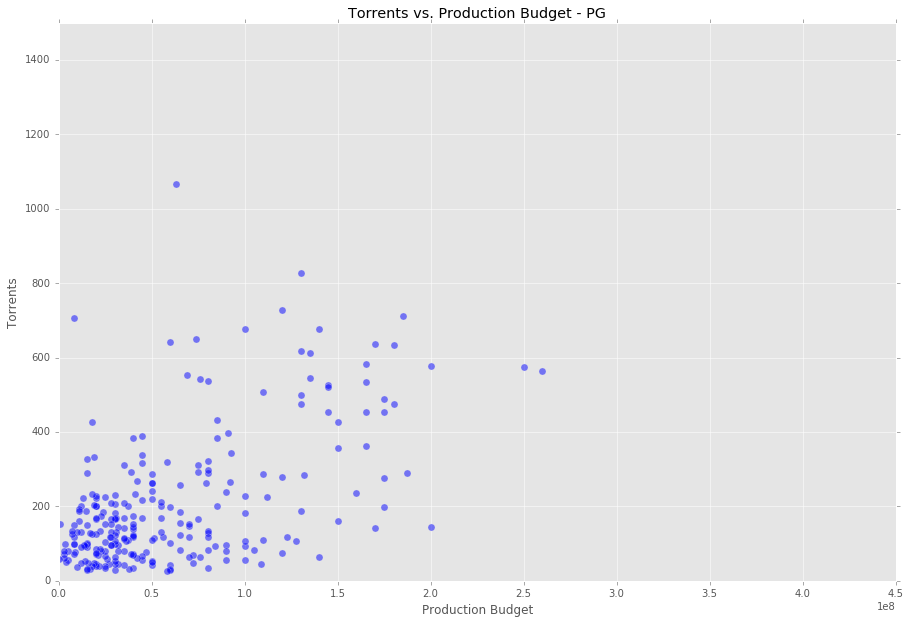

In [13]:
term = 'PG'
df_a = df.loc[df['Rated']== term]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

In [14]:
df_sub = df[['Prod_Budget', 'Rated', 'Total_Torrents']]
df_sub.describe()

,Prod_Budget,Total_Torrents
count,1.626000e+03,1626.000000
mean,4.830562e+07,225.587946
std,4.440061e+07,197.668213
min,6.800000e+04,17.000000
25%,2.000000e+07,89.250000
50%,3.500000e+07,160.000000
75%,6.000000e+07,303.000000
max,4.250000e+08,1450.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e22a550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e6b3390>]], dtype=object)

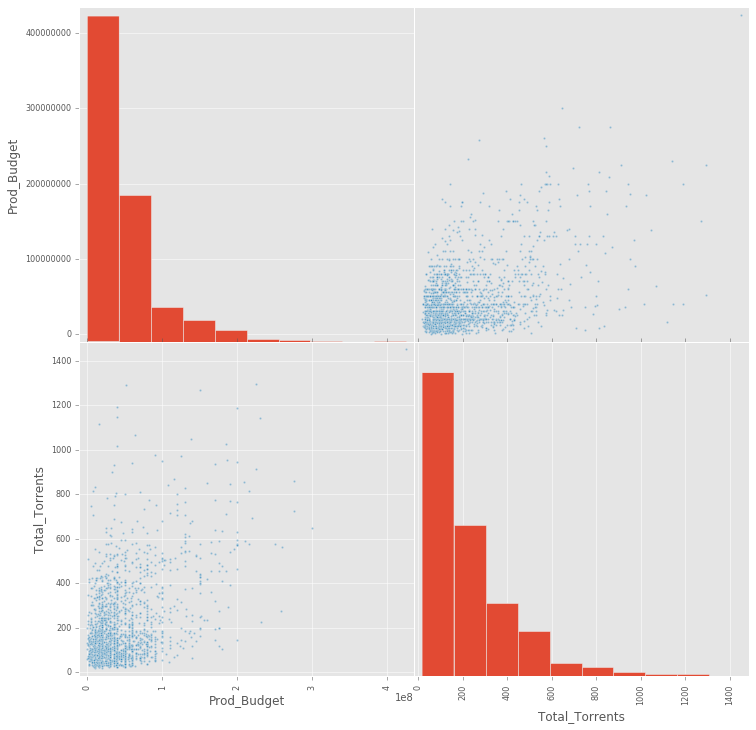

In [15]:
# Lets take a look at our entire model
plt.rcParams['figure.figsize'] = (12, 12)
pd.tools.plotting.scatter_matrix(df_sub)

In [16]:
# select only genres of significance
rating = ['R', 'PG-13', 'PG', 'G']
df_sub = df_sub.loc[df_sub['Rated'].isin(rating)]

In [17]:
from patsy import dmatrices

y, x = dmatrices('Total_Torrents ~ Prod_Budget + Rated', data=df_sub, return_type='dataframe')

In [18]:
y.head()

,Total_Torrents
0,1450.0
1,647.0
2,861.0
3,723.0
4,563.0


In [19]:
x.head()

,Intercept,Rated[T.PG],Rated[T.PG-13],Rated[T.R],Prod_Budget
0,1.0,0.0,1.0,0.0,425000000.0
1,1.0,0.0,1.0,0.0,300000000.0
2,1.0,0.0,1.0,0.0,275000000.0
3,1.0,0.0,1.0,0.0,275000000.0
4,1.0,1.0,0.0,0.0,260000000.0


In [20]:
import statsmodels.api as sm

model = sm.OLS(y, x)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Torrents   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     119.6
Date:                Thu, 14 Jul 2016   Prob (F-statistic):           1.83e-89
Time:                        14:37:17   Log-Likelihood:                -10692.
No. Observations:                1626   AIC:                         2.139e+04
Df Residuals:                    1621   BIC:                         2.142e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        109.2815     38.955      2.805      0.005        32.875   185.688
Rated[T.PG]      -35.6246     39.575     -0.900      0.368      -113.248    41.999
Rated[T.PG-13]     7.0745     38.669      0.183      0.855       -68.772    82.920
Rated[T.R]        32.3626     38.886      0.832      0.405       -43.910   108.635
Prod_Budget      2.18e-06   1.01e-07     21.550      0.000      1.98e-06  2.38e-06
==============================================================================
Omnibus:                      513.864   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1814.510
Skew:                           1.535   Prob(JB):                         0.00
Kurtosis:                       7.167   Cond. No.                     1.17e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
import statsmodels.formula.api as smf

results = smf.ols(formula='Total_Torrents ~ Prod_Budget + Rated', data=df_sub,).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Torrents   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     119.6
Date:                Thu, 14 Jul 2016   Prob (F-statistic):           1.83e-89
Time:                        14:37:17   Log-Likelihood:                -10692.
No. Observations:                1626   AIC:                         2.139e+04
Df Residuals:                    1621   BIC:                         2.142e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        109.2815     38.955      2.805      0.005        32.875   185.688
Rated[T.PG]      -35.6246     39.575     -0.900      0.368      -113.248    41.999
Rated[T.PG-13]     7.0745     38.669      0.183      0.855       -68.772    82.920
Rated[T.R]        32.3626     38.886      0.832      0.405       -43.910   108.635
Prod_Budget      2.18e-06   1.01e-07     21.550      0.000      1.98e-06  2.38e-06
==============================================================================
Omnibus:                      513.864   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1814.510
Skew:                           1.535   Prob(JB):                         0.00
Kurtosis:                       7.167   Cond. No.                     1.17e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
model.score(x, y)

0.22782338044090034

In [24]:
model.coef_

array([[  0.00000000e+00,  -3.56246153e+01,   7.07447262e+00,
          3.23625515e+01,   2.17963363e-06]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110f9b438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11106fe80>]], dtype=object)

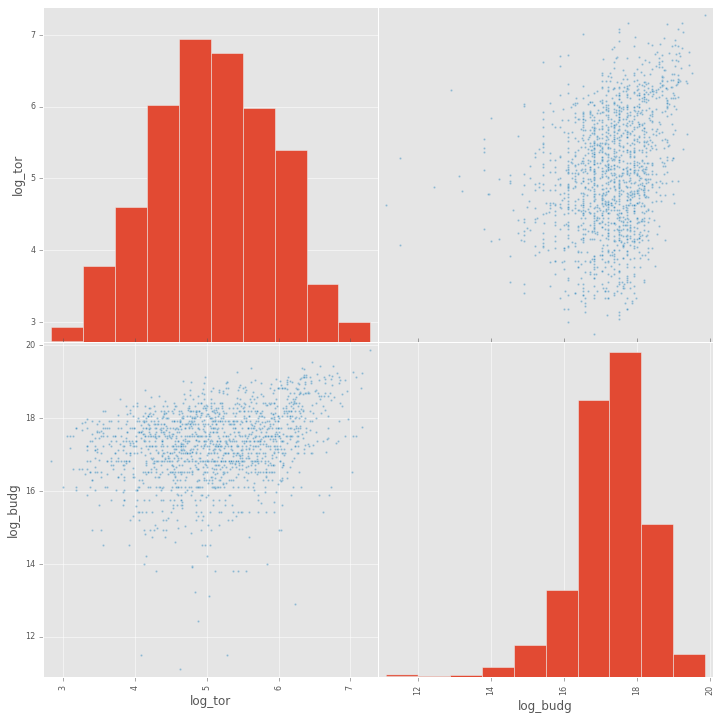

In [25]:
df_sub['log_tor']=np.log(df_sub.Total_Torrents)
df_sub['log_budg']=np.log(df_sub.Prod_Budget)

trans=df_sub[['log_tor','log_budg']]
pd.tools.plotting.scatter_matrix(trans)

---
# Log Transform

In [26]:
y, x = dmatrices('log_tor ~ log_budg + Rated', data=df_sub, return_type='dataframe')
x.head()

,Intercept,Rated[T.PG],Rated[T.PG-13],Rated[T.R],log_budg
0,1.0,0.0,1.0,0.0,19.867600
1,1.0,0.0,1.0,0.0,19.519293
2,1.0,0.0,1.0,0.0,19.432282
3,1.0,0.0,1.0,0.0,19.432282
4,1.0,1.0,0.0,0.0,19.376192


In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

model.score(x,y)

0.095513496453844882

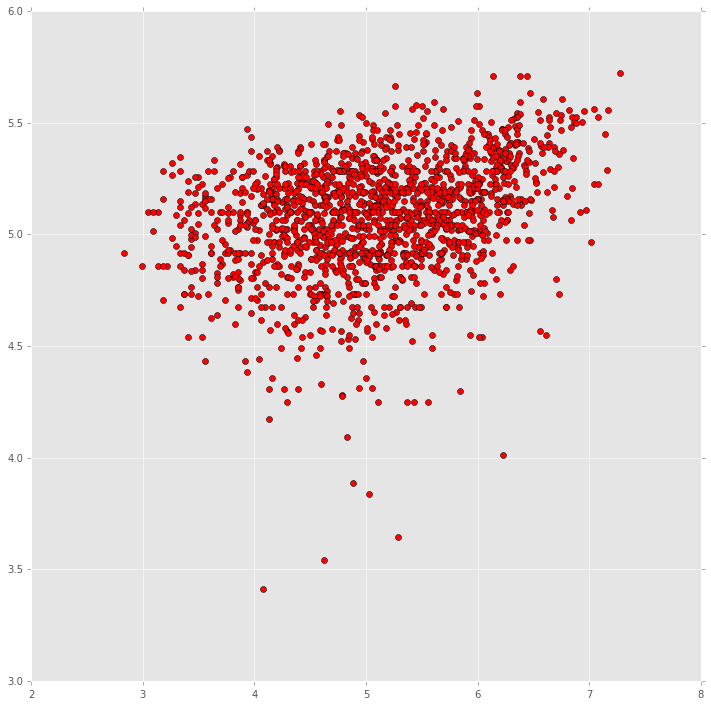

In [28]:
_ = plt.plot(y, model.predict(x), 'ro')

In [29]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.333,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

In [30]:
metrics.mean_squared_error(y_train,model.predict(x_train))

0.65289523189813303

In [31]:
model.score(x_train, y_train)

0.087919426419258873

In [32]:
metrics.mean_squared_error(y_test,model.predict(x_test))

0.59554295158160286

In [33]:
# reset x, y otherwise errors occur
y, x = dmatrices('log_tor ~ log_budg + Rated', data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=100, shuffle=True)

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

clf2.score(x,y)

0.095394608503311717